In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from edu.javerianacali.create_dataset import CreateDataSet
from edu.javerianacali.model.ccn_model import ConvulationalNeuralNetwork
from edu.javerianacali.model.logistic_regression_model import LogisticRegressionModel
from edu.javerianacali.process_images import ProcessImages
from edu.javerianacali.data_aumentation import DataAugmentation
from edu.javerianacali.model.svm_model import SupportVectorMachineModel
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"


# AUMENTO DE DATOS

In [ ]:

from edu.javerianacali.data_aumentation import DataAugmentation

DataAugmentation().augment_images(directorio+'/poquitas'

)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,96)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:
create_dataset = CreateDataSet().create_dataset(directorio)
LogisticRegressionModel().prepare_dataset(directorio)
print(create_dataset[1])
LogisticRegressionModel().train_model(create_dataset[0], create_dataset[1])



In [ ]:


from edu.javerianacali.model.svm_model import SupportVectorMachineModel
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]
print(features)
SupportVectorMachineModel().train_svm_model(features, labels)


# ALGORITMOS NO SUPERVISADOS

In [ ]:
path=directorio
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,150,150)
       # ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:

CreateDataSet().create_dataset_cnn(directorio)

In [1]:
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from edu.javerianacali.create_dataset import CreateDataSet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt




datagen = ImageDataGenerator(rescale=1./255,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
print(directorio
+'/train')
generator = datagen.flow_from_directory(
directorio+'/train',
target_size=(150, 150),  
batch_size=32,
class_mode='binary' ) # Usa 'binary' si solo tienes dos clases


# Generador de datos de validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directorio+'/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


2024-05-16 19:45:38.243432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 19:45:38.245821: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 19:45:38.277380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 19:45:38.988925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets/train
Found 230 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [2]:
import tensorflow as tf
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
modelo = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, (5,3), activation='relu'), # 3,3 o 5,5, buscar que es padding
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, (3, 3), activation='relu'), # Capa adicional
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),  # Capa de abandono para regularización
            Dense(1, activation='sigmoid'),  # Añade la capa Dense según el tamaño de salida de Flatten
        ])


# Aquí puedes imprimir la forma de la salida para ver cuántas neuronas necesita la siguiente capa Dense
modelo.summary()


modelo.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),  # Ajustar la tasa de aprendizaje
    loss='binary_crossentropy',  
    metrics=['accuracy'])

weights = {0: 1, 1: 10} 
historial = modelo.fit(
    generator,
    epochs=10,
      class_weight=weights,  # Aumentar el número de épocas
    validation_data=validation_generator,
    batch_size=32
)


/home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 72, 64)     │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 33, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,456,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,562,241 (17.40 MB)

 Trainable params: 4,562,241 (17.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/home/maucasco/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-16 19:45:46.288845: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2024-05-16 19:45:46.366333: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 41287680 exceeds 10% of free system memory.
2024-05-16 19:45:46.553512: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 41287680 exceeds 10% of free system memory.


1/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4062 - loss: 4.9729

2024-05-16 19:45:46.782205: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-05-16 19:45:46.782330: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.4341 - loss: 2.8647 - val_accuracy: 0.4206 - val_loss: 0.7743
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.6265 - loss: 1.0652 - val_accuracy: 0.4299 - val_loss: 0.8347
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 676ms/step - accuracy: 0.4510 - loss: 1.1538 - val_accuracy: 0.4299 - val_loss: 0.8447
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 691ms/step - accuracy: 0.4903 - loss: 0.9611 - val_accuracy: 0.5981 - val_loss: 0.6865
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 759ms/step - accuracy: 0.5466 - loss: 0.9307 - val_accuracy: 0.5234 - val_loss: 0.9142
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 935ms/step - accuracy: 0.5674 - loss: 0.9979 - val_accuracy: 0.5794 - val_loss: 0.7696
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 887ms/step - accuracy: 0.6055 - loss: 0.8513 - val_accuracy: 0.6916 - val_loss: 0.6626
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step - accuracy: 0.7165 - loss: 0.9734 - val_accuracy: 0.7196 - val_loss: 0.5781
Epo

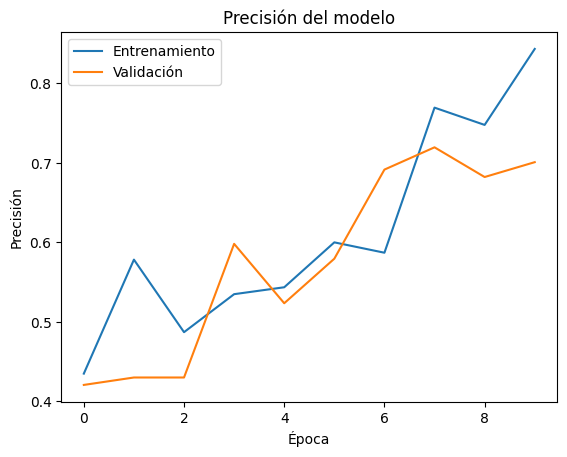

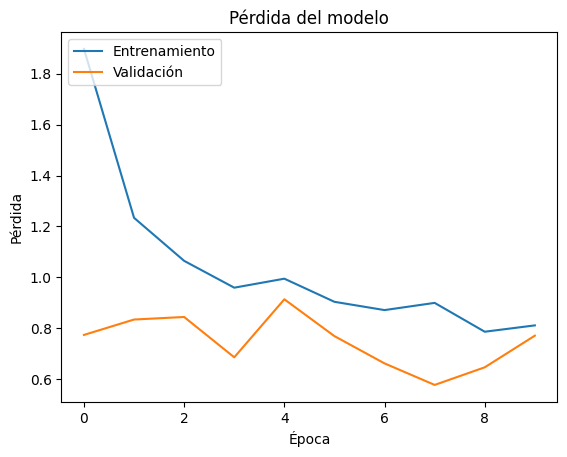

In [3]:

# Gráficos de precisión y pérdida
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])  # Precisión de validación
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])  # Pérdida de validación
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')# Añade la capa Dense según el tamaño de salida de Flatten


plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
plot_model(modelo, to_file='/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo1_cnn.png', show_shapes=True, show_layer_names=True)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 
[[0.5483234 ]
 [0.9999999 ]
 [0.41433403]
 [0.814026  ]
 [0.20899498]
 [0.9999653 ]
 [0.68082905]
 [0.36787486]
 [0.31814083]
 [0.21309526]
 [0.99999624]
 [0.9999991 ]
 [0.5031221 ]
 [0.18604362]
 [0.6832364 ]
 [1.        ]
 [1.        ]
 [0.51069504]
 [0.99998665]
 [0.57460386]
 [0.5610392 ]
 [0.99517393]
 [0.99999964]
 [0.15021518]
 [0.38972354]
 [0.99982214]
 [0.999991  ]
 [0.72793597]
 [0.99999994]
 [0.27003357]
 [0.7068116 ]
 [0.7237839 ]
 [0.66147286]
 [0.28363743]
 [0.29663864]
 [0.99999964]
 [0.44757125]
 [0.19375455]
 [0.35851282]
 [0.96910447]
 [0.5936086 ]
 [0.50924075]
 [0.330853  ]
 [0.6326925 ]
 [0.53249896]
 [0.9056248 ]
 [0.9999834 ]
 [0.9999994 ]
 [0.5923982 ]
 [0.29255673]
 [0.2574891 ]
 [0.6096347 ]
 [0.99998283]
 [0.9999903 ]
 [0.9999939 ]
 [0.99997854]
 [0.15861218]
 [0.38844955]
 [1.        ]
 [0.99998146]
 [0.99999994]
 [0.75046164]
 [0.66463387]
 [0.99999577]
 [0.9999983 ]
 [0.19994076]
 [0.46340486]
 [0.99995446]
 [0.99999

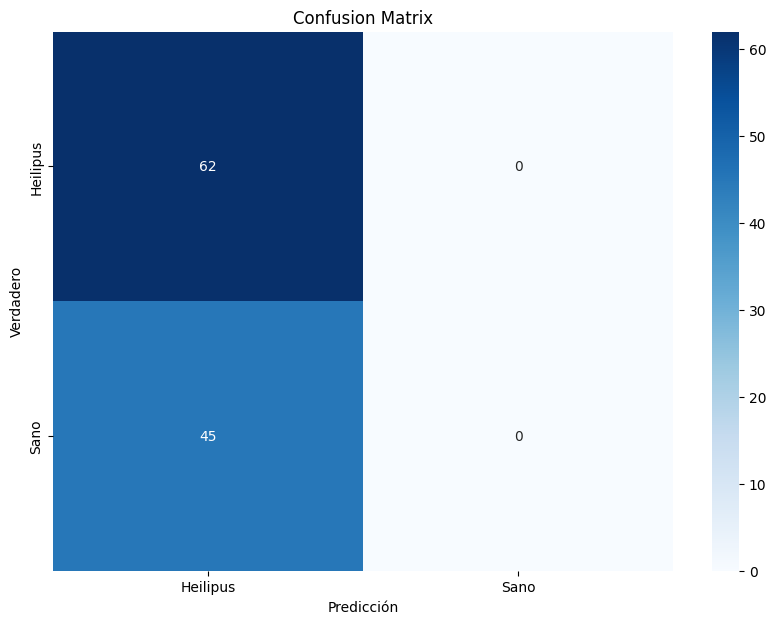

Classification Report
{'0': {'precision': 0.5794392523364486, 'recall': 1.0, 'f1-score': 0.7337278106508875, 'support': 62.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45.0}, 'accuracy': 0.5794392523364486, 'macro avg': {'precision': 0.2897196261682243, 'recall': 0.5, 'f1-score': 0.3668639053254438, 'support': 107.0}, 'weighted avg': {'precision': 0.33574984714822254, 'recall': 0.5794392523364486, 'f1-score': 0.4251506940220096, 'support': 107.0}}


/home/maucasco/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maucasco/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maucasco/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.579439,1.000000,0.733728,62.000000
1,0.000000,0.000000,0.000000,45.000000
accuracy,0.579439,0.579439,0.579439,0.579439
macro avg,0.289720,0.500000,0.366864,107.000000
weighted avg,0.335750,0.579439,0.425151,107.000000


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
# Evaluar el modelo en el conjunto de prueba o validación
# Asumiendo que tienes `validation_generator` como tu conjunto de validación/test
y_pred = modelo.predict(validation_generator)
y_test = validation_generator.classes  # Etiquetas verdaderas
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)  # esto cambia por que es una sola neurona hardlim   
print(y_pred)
print(y_test)
# Matriz de confusiónvalidation_generator
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Obtener nombres de clases desde el generador
class_names = list(validation_generator.class_indices.keys())
print(class_names)
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


In [ ]:
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa de falsos Negativos')
    plt.title('Curva ROC ')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt

# Crear un modelo que devuelva las activaciones de la primera capa convolucional
activation_model = Model(inputs=modelo.input, outputs=modelo.layers[0].output)

# Obtener las activaciones de la primera capa convolucional para la primera imagen en el conjunto de entrenamiento
activations = activation_model.predict(validation_generator[0][0][0].reshape(1, 500, 500, 3))

# Visualizar las activaciones de los primeros 6 filtros
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Suponiendo que tienes todas tus imágenes y etiquetas cargadas en X e Y
# X, Y = load_data()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Crear el modelo de CNN aquí
    modelo = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 130, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

    # Evaluar el modelo
    scores = modelo.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no += 1

In [ ]:
# Guardar el modelo en un archivo
modelo.save('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')


In [ ]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

In [ ]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/images.jpeg'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)


plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)